# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:
* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dogImages`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [1]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("./data/lfw/*/*"))
dog_files = np.array(glob("./data/dogImages/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13234 total human images.
There are 8351 total dog images.


In [2]:
dog_files_train = np.array(glob("./data/dogImages/train/*/*"))
dog_files_valid = np.array(glob("./data/dogImages/valid/*/*"))
dog_files_test = np.array(glob("./data/dogImages/test/*/*"))
print(len(dog_files_train))
print(len(dog_files_valid))
print(len(dog_files_test))

6680
835
836


<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


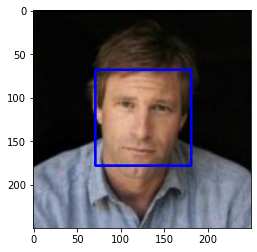

In [87]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[0])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [88]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 
(You can print out your results and/or write your percentages in this cell)

In [39]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.
auxCount=0
for i in range(len(human_files_short)):
    if face_detector(human_files_short[i]) == True:
        auxCount+=1
pct_Humans_HumanImages=(auxCount/len(human_files_short))*100
auxCount=0
for i in range(len(dog_files_short)):
    if face_detector(dog_files_short[i]) == True:
        auxCount+=1
pct_Humans_DogImages=(auxCount/len(dog_files_short))*100
print('Percentage of Human Faces in Human Images is {}%'.format(pct_Humans_HumanImages))
print('Percentage of Human Faces in Dog Images is {}%'.format(pct_Humans_DogImages))

Percentage of Human Faces in Human Images is 96.0%
Percentage of Human Faces in Dog Images is 18.0%


We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [6]:
### (Optional) 
### TODO: Test performance of another face detection algorithm.
### Feel free to use as many code cells as needed.

---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [3]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()
print(VGG16)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [5]:
# UTILITY FUNCTIONS
def load_image(img_path, max_size=400, shape=None):
    ''' Load in and transform an image, making sure the image
       is <= 400 pixels in the x-y dims.'''
    if "http" in img_path:
        response = requests.get(img_path)
        image = Image.open(BytesIO(response.content)).convert('RGB')
    else:
        image = Image.open(img_path).convert('RGB')
    
    # large images will slow down processing
    if max(image.size) > max_size:
        size = max_size
    else:
        size = max(image.size)
    
    if shape is not None:
        size = shape
    
    # below enables us to deal w/ jpegs and pngs and ensure size is reasonable for our purposes
    in_transform = transforms.Compose([
                        transforms.Resize(size),
                        transforms.ToTensor(),
                        transforms.Normalize((0.485, 0.456, 0.406), 
                                             (0.229, 0.224, 0.225))])

    # discard the transparent, alpha channel (that's the :3) and add the batch dimension
    image = in_transform(image)[:3,:,:].unsqueeze(0)
    
    return image

def load_image_vgg16(img_path, max_size=400, shape=None):
    ''' Load in and transform an image, making sure the image
       is <= 400 pixels in the x-y dims.'''
    if "http" in img_path:
        response = requests.get(img_path)
        image = Image.open(BytesIO(response.content)).convert('RGB')
    else:
        image = Image.open(img_path).convert('RGB')
    
    # large images will slow down processing
    if max(image.size) > max_size:
        size = max_size
    else:
        size = max(image.size)
    
    if shape is not None:
        size = shape
    
    # below enables us to deal w/ jpegs and pngs and ensure size is reasonable for our purposes
    in_transform = transforms.Compose([transforms.Resize(255),   # TODO: compose transforms here
                                 transforms.CenterCrop(224),
                                 transforms.ToTensor(),
                                 transforms.Normalize([0.485, 0.456, 0.406], 
                                                      [0.229, 0.224, 0.225])])

    image = in_transform(image).unsqueeze(0)
    
    return image

# helper function for un-normalizing an image 
# and converting it from a Tensor image to a NumPy image for display
def im_convert(tensor):
    """ Display a tensor as an image. """
    
    image = tensor.to("cpu").clone().detach()
    image = image.numpy().squeeze()
    image = image.transpose(1,2,0)
    image = image * np.array((0.229, 0.224, 0.225)) + np.array((0.485, 0.456, 0.406))
    image = image.clip(0, 1)

    return image

In [6]:
from PIL import Image
import torchvision.transforms as transforms

# Set PIL to be tolerant of image files that are truncated.
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

from torchvision import datasets

import matplotlib.pyplot as plt
#import helper
#from numpy import asarray

# device is GPU, if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''    
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image
    # TEST: display the image
#    content = load_image(img_fullPath).to(device)
#    fig, ax = plt.subplots()
#    ax.imshow(im_convert(content))
    content = load_image_vgg16(img_path).to(device)
    out=VGG16.forward(content)
    
    return torch.argmax(out).item() # predicted class index

VGG16_predict('./data/dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg')

252

### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [90]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    ## TODO: Complete the function.
    if VGG16_predict(img_path) >= 151 and VGG16_predict(img_path) <= 268:
        return True # true/false
    else:
        return False
dog_detector('./data/dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg')

True

### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__ 


In [44]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.
# load color (BGR) image
auxCount=0
for i in range(len(human_files_short)):
    if dog_detector(human_files_short[i]) == True:
        auxCount+=1
pct_Dogs_HumanImages=(auxCount/len(human_files_short))*100
auxCount=0
for i in range(len(dog_files_short)):
    if dog_detector(dog_files_short[i]) == True:
        auxCount+=1
pct_Dogs_DogImages=(auxCount/len(dog_files_short))*100
print('Percentage of Dogs detected in Human Images is {}%'.format(pct_Dogs_HumanImages))
print('Percentage of Dogs detected in Dog Images is {}%'.format(pct_Dogs_DogImages))

Percentage of Dogs detected in Human Images is 0.0%
Percentage of Dogs detected in Dog Images is 94.0%


We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [ ]:
### (Optional) 
### TODO: Report the performance of another pre-trained network.
### Feel free to use as many code cells as needed.

---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<AxesSubplot:>

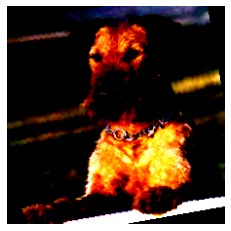

In [62]:
import os
from torchvision import datasets

### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes
import helper

train_dir='./data/dogImages/train'
test_dir='./data/dogImages/test'
valid_dir='./data/dogImages/valid'
# define dataloader parameters
batch_size = 20
num_workers=0

train_transforms = transforms.Compose([transforms.Resize(256),
                                 transforms.RandomResizedCrop(224),#224 # TODO: compose transforms here
                                 transforms.RandomHorizontalFlip(),
                                 transforms.RandomRotation(20),
                                 transforms.ToTensor(),
                                 transforms.Normalize([0.485, 0.456, 0.406], 
                                                      [0.229, 0.224, 0.225])])


#                                 transforms.RandomHorizontalFlip(), # randomly flip and rotate
#                                 transforms.RandomVerticalFlip(),      
#                                 transforms.RandomRotation(20),
            
test_transforms = transforms.Compose([transforms.Resize(256),
                                 transforms.CenterCrop(224),
                                 transforms.ToTensor(),
                                 transforms.Normalize([0.485, 0.456, 0.406], 
                                                      [0.229, 0.224, 0.225])])

train_data = datasets.ImageFolder(train_dir,transform=train_transforms)
test_data = datasets.ImageFolder(test_dir,transform=test_transforms)
valid_data = datasets.ImageFolder(valid_dir,transform=test_transforms)

train_dl = torch.utils.data.DataLoader(train_data, batch_size=batch_size, num_workers=num_workers, shuffle=True)
test_dl = torch.utils.data.DataLoader(test_data, batch_size=batch_size, num_workers=num_workers, shuffle=True)
valid_dl = torch.utils.data.DataLoader(valid_data, batch_size=batch_size, num_workers=num_workers, shuffle=True)
loaders_scratch = {'train': train_dl, 'test': test_dl, 'valid': valid_dl}

# visualize
images, labels = next(iter(loaders_scratch['train']))
helper.imshow(images[0], normalize=False)

**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**: After resizing the images to 256 pixels, I am implementing a square crop for 224 pixels wide centered at the center of the image. Finally I am normalizing the RGB data to have zero mean and unitary standard deviation (using the sample mean and standard deviations from the ImageNet dataset). In this way I am hoping to obtain pixel values that follow a standard normal distribution. I also augmented the training dataset by random cropping, horizontal flips and rotations.

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [27]:
import torch.nn as nn
import torch.nn.functional as F

# define the CNN architecture
class Net(nn.Module):
    ### TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        ## Define layers of a CNN
        self.conv0 = nn.Conv2d(3,32,3,padding=1)
        #self.conv1 = nn.Conv2d(16,32,3,padding=1)
        # max pooling layer
        self.pool = nn.MaxPool2d(2, 2)
        self.conv1 = nn.Conv2d(32,64,3,padding=1)
        self.conv2 = nn.Conv2d(64,128,3,padding=1)
  #      self.conv4 = nn.Conv2d(128,256,3,padding=1)
        #self.conv5 = nn.Conv2d(256,512,3,padding=1)
        
        #self.fc1 = nn.Linear(64*28*28, 512)
        self.fc1 = nn.Linear(128*28*28, 133)
        #self.fc1 = nn.Linear(256*7*7, 4096)
        #self.fc1 = nn.Linear(512*7*7, 4096)
        #self.fc2 = nn.Linear(1024, 512)
        #self.fc3 = nn.Linear(512, 133) #there are 133 dog breeds
        # Dropout module 
        self.dropout = nn.Dropout(p=0.35)
        # Batch normalization
        self.conv_bn0 = nn.BatchNorm2d(32)
        self.conv_bn1 = nn.BatchNorm2d(64)
        self.conv_bn2 = nn.BatchNorm2d(128)
        
    def forward(self, x):
        ## Define forward behavior
        # add sequence of convolutional and max pooling layers
        x = self.conv_bn0(self.pool(F.relu(self.conv0(x))))
        #x = self.pool(F.relu(self.conv1(x)))
        x = self.conv_bn1(self.pool(F.relu(self.conv1(x))))
        x = self.conv_bn2(self.pool(F.relu(self.conv2(x))))
       # x = self.pool(F.relu(self.conv4(x)))
        #x = self.pool(F.relu(self.conv5(x)))
        # make sure input tensor is flattened
       # x = self.dropout(x)
        x = x.view(-1,128*28*28) 
        x = self.dropout(x)
        #x = F.relu(self.fc1(x))
        #x = self.dropout(x)
        x = self.fc1(x)
        #x = F.relu(self.fc2(x))
        #x = self.dropout(x)
        #x = self.fc3(x)
        
        return x


#-#-# You do NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()
print(model_scratch)

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

Net(
  (conv0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv1): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=100352, out_features=133, bias=True)
  (dropout): Dropout(p=0.35, inplace=False)
  (conv_bn0): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv_bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv_bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)


__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__After many attempts I zeroed in on a model that is more complex on the convolutional side (3 layers) and less complex on the fully connected layers. The latter was primarily in order to avoid overfitting (i.e. it was tough to bring down the loss for the validation data). I also added dropout with 0.35pct as another avenue to reduce overfitting. In relation to the convolutional layers I found 3 layers to be a good compromise, together with standard RelU activation functions and max pooling layers. I also found it was necessary to add batch normalization to the convolutional layers.

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [29]:
import torch.optim as optim

### TODO: select loss function
#criterion_scratch = nn.NLLLoss()
criterion_scratch = nn.CrossEntropyLoss()

### TODO: select optimizer
#optimizer_scratch = optim.Adam(model_scratch.parameters(), lr=0.003)
#optimizer_scratch = optim.SGD(model_scratch.parameters(), lr= 0.003, weight_decay=1e-6, momentum=0.9, nesterov = True)
optimizer_scratch = optim.SGD(model_scratch.parameters(), lr= 0.002)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [15]:
# the following import is required for training to be robust to truncated images

from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train() #turns drop-out on
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            # clear the gradients of all optimized variables
            optimizer.zero_grad()
            ## find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            #########################################################
            #print('train'+str(batch_idx))
            #print(data.shape)
            output = model(data)
            #print(output.data[0]) #print one sample output - values across all 133 breeds
            # calculate the loss
            loss = criterion(output, target)
            # backward pass: compute gradient of the loss with respect to model parameters
            loss.backward()
            # perform a single optimization step (parameter update)
            optimizer.step()
            # update running (avg) training loss
            #train_loss += ((1 / (batch_idx + 1)) * (loss.data - train_loss)) #loss.item() is avg loss over batch
            train_loss += loss.data*data.size(0)
            #Note: the above is equivalent to: train_loss=(loss.item()+train_loss*(batch_idx))/(batch_idx+1); batchIdx starts w/ 0
            #### data.size(0)=32 - i.e. batch size in above calcs?
            
        ######################    
        # validate the model #
        ######################
        # turn off gradients
        model.eval() # turns off drop-out so we can use model to make predictions
        with torch.no_grad():
            for batch_idx, (data, target) in enumerate(loaders['valid']):
                # move to GPU
                if use_cuda:
                    data, target = data.cuda(), target.cuda()
                ## update the average validation loss
                #################################################
                #print('valid'+str(batch_idx))
                output = model(data)
                loss = criterion(output, target)
                #valid_loss += ((1 / (batch_idx + 1)) * (loss.data - valid_loss))
                valid_loss += loss.data*data.size(0)
            
        # calculate average losses
        train_loss = train_loss/len(loaders['train'].dataset)
        valid_loss = valid_loss/len(loaders['valid'].dataset)    
    
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
        #torch.save(model.state_dict(),str(epoch)+save_path)
        # CHANGE - only save if valid loss <= valid loss min
        if valid_loss<=valid_loss_min:
            valid_loss_min=valid_loss
            torch.save(model.state_dict(),save_path)
            
    # return trained model
    return model


# train the model
################ changed- from 100 epochs
model_scratch = train(100, loaders_scratch, model_scratch, optimizer_scratch, 
                      criterion_scratch, use_cuda, 'model_scratch.pt')

# load the model that got the best validation accuracy
model_scratch=Net()
model_scratch.load_state_dict(torch.load('model_scratch.pt'))
# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [77]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

# call test function
model_scratch=Net()
model_scratch.load_state_dict(torch.load('model_scratch.pt'))
# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()
    
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 3.580341


Test Accuracy: 21% (182/836)


---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<AxesSubplot:>

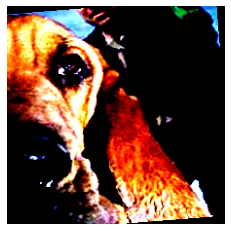

In [17]:
import os
from torchvision import datasets

### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes
import helper

train_dir='./data/dogImages/train'
test_dir='./data/dogImages/test'
valid_dir='./data/dogImages/valid'
# define dataloader parameters
batch_size = 20
num_workers=0

train_transforms = transforms.Compose([transforms.Resize(256),
                                 transforms.RandomResizedCrop(224),#224 # TODO: compose transforms here
                                 transforms.RandomHorizontalFlip(),
                                 transforms.RandomRotation(20),
                                 transforms.ToTensor(),
                                 transforms.Normalize([0.485, 0.456, 0.406], 
                                                      [0.229, 0.224, 0.225])])


#                                 transforms.RandomHorizontalFlip(), # randomly flip and rotate
#                                 transforms.RandomVerticalFlip(),      
#                                 transforms.RandomRotation(20),
            
test_transforms = transforms.Compose([transforms.Resize(256),
                                 transforms.CenterCrop(224),
                                 transforms.ToTensor(),
                                 transforms.Normalize([0.485, 0.456, 0.406], 
                                                      [0.229, 0.224, 0.225])])

train_data = datasets.ImageFolder(train_dir,transform=train_transforms)
test_data = datasets.ImageFolder(test_dir,transform=test_transforms)
valid_data = datasets.ImageFolder(valid_dir,transform=test_transforms)

train_dl = torch.utils.data.DataLoader(train_data, batch_size=batch_size, num_workers=num_workers, shuffle=True)
test_dl = torch.utils.data.DataLoader(test_data, batch_size=batch_size, num_workers=num_workers, shuffle=True)
valid_dl = torch.utils.data.DataLoader(valid_data, batch_size=batch_size, num_workers=num_workers, shuffle=True)
loaders_transfer = {'train': train_dl, 'test': test_dl, 'valid': valid_dl}

# visualize
images, labels = next(iter(loaders_scratch['train']))
helper.imshow(images[0], normalize=False)

### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [18]:
import torch
import torchvision.models as models
import torch.nn as nn

## TODO: Specify model architecture 
# define resnet50 model
model_transfer = models.resnet50(pretrained=True)

## new layers
#Replace the last layer
model_transfer.fc = nn.Linear(2048, 133, bias=True)
classifier = nn.Sequential(nn.Dropout(p=0.35),
                           nn.Linear(2048, 133))
model_transfer.classifier=classifier
print(model_transfer)

if use_cuda:
    model_transfer = model_transfer.cuda()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ I decided to use the resnet model as it handles well networks with large numbers of layers. In terms of the classifier I first went with three layers and kept reducing the number to bring down the overfitting. I ended up with the simplest of models with only one layer and a dropout at 35%.


### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [19]:
import torch.optim as optim

criterion_transfer = nn.CrossEntropyLoss()

### TODO: select optimizer
#optimizer_transfer = optim.SGD(model_scratch.parameters(), lr= 0.001, weight_decay=1e-6, momentum=0.9, nesterov = True)
optimizer_transfer = optim.SGD(model_transfer.parameters(), lr= 0.002)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [22]:
# train the model
model_transfer = train(50, loaders_transfer, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, 'model_transfer.pt')
8
# load the model that got the best validation accuracy (uncomment the line below)
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

Epoch: 1 	Training Loss: 2.752590 	Validation Loss: 1.650806
Epoch: 2 	Training Loss: 2.362443 	Validation Loss: 1.316222
Epoch: 3 	Training Loss: 2.081887 	Validation Loss: 1.100206
Epoch: 4 	Training Loss: 1.871896 	Validation Loss: 0.947224
Epoch: 5 	Training Loss: 1.687009 	Validation Loss: 0.861605
Epoch: 6 	Training Loss: 1.570614 	Validation Loss: 0.770204
Epoch: 7 	Training Loss: 1.450503 	Validation Loss: 0.715363
Epoch: 8 	Training Loss: 1.387449 	Validation Loss: 0.644192
Epoch: 9 	Training Loss: 1.311003 	Validation Loss: 0.612689
Epoch: 10 	Training Loss: 1.252489 	Validation Loss: 0.573408
Epoch: 11 	Training Loss: 1.190922 	Validation Loss: 0.552023
Epoch: 12 	Training Loss: 1.147826 	Validation Loss: 0.528501
Epoch: 13 	Training Loss: 1.094101 	Validation Loss: 0.492410
Epoch: 14 	Training Loss: 1.063112 	Validation Loss: 0.479449
Epoch: 15 	Training Loss: 1.035615 	Validation Loss: 0.468743
Epoch: 16 	Training Loss: 1.004638 	Validation Loss: 0.462443
Epoch: 17 	Traini

<All keys matched successfully>

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [31]:
# load the model that got the best validation accuracy (uncomment the line below)
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 0.321710


Test Accuracy: 89% (748/836)


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [110]:
from PIL import Image

# load the model that got the best validation accuracy (uncomment the line below)
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.
dog_files_train_3 = np.array([item[23:] for item in glob("./data/dogImages/train/*")])
dog_files_test_3 = np.array([item[23:] for item in glob("./data/dogImages/test/*")])
dog_files_valid_3 = np.array([item[23:] for item in glob("./data/dogImages/valid/*")])
data_transfer_2 = {'train': dog_files_train_3, 'test': dog_files_test_3, 'valid': dog_files_valid_3}
# list of class names by index, i.e. a name can be accessed like class_names[0]
class_names = [item[4:].replace("_", " ") for item in data_transfer_2['train']]

img_path="./data/dogImages/train/108.Norwegian_buhund/Norwegian_buhund_07093.jpg"
#img_path="./data/dogImages/train/009.American_water_spaniel/American_water_spaniel_00619.jpg"

preprocess = transforms.Compose([transforms.Resize(256),
                                 transforms.CenterCrop(224),
                                 transforms.ToTensor(),
                                 transforms.Normalize([0.485, 0.456, 0.406], 
                                                      [0.229, 0.224, 0.225])])
def process_img(img_path):
    img = Image.open(img_path)
    img2 = preprocess(img)
    return img2
    
def predict_breed_transfer(img_path):
    pred = 0
    # load the image and return the predicted breed
    img2=process_img(img_path)
    output = model_transfer(torch.unsqueeze(img2,0).cuda())
    pred = output.data.max(1, keepdim=True)[1]    
    return class_names[pred]

print(predict_breed_transfer(img_path))

Norwegian buhund


---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `dog_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Hi, Dog!
Your breed is: Norwegian buhund


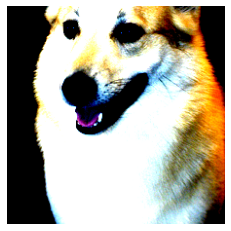

In [112]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.
img_path="./data/dogImages/train/108.Norwegian_buhund/Norwegian_buhund_07093.jpg"
#img_path="./data/dogImages/train/009.American_water_spaniel/American_water_spaniel_00619.jpg"

def run_app(img_path):
    ## handle cases for a human face, dog, and neither       
    if face_detector(img_path): 
        print("Hi, Human!")
        img=process_img(img_path)
        helper.imshow(img, normalize=False)
        print("You look like a ...: "+predict_breed_transfer(img_path))
    else:
        if dog_detector(img_path): 
            print("Hi, Dog!")
            img=process_img(img_path)
            helper.imshow(img, normalize=False)
            print("Your breed is: "+predict_breed_transfer(img_path))
        else:
            print("Error: you are neither a human nor a dog")
            
run_app(img_path)

---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ (Three possible points for improvement) The output is a bit worse than I expected. Our jellicle cat was identified as a dog (Boston terrier) and our Nova Scotia duck tolling retriever was identified as a human (though the breed was later correctly identified). The remaining 4 images were correctly classified as dog / human. 1 possible improvement would be in the logic in run_app to positively enforce that humans are non dogs (and dogs are non humans). For both the man faces and the dog identifications we could ensure the photos are appropriately resized, cropped and normalized. For the man faces perhaps we could investigate other approaches besides the haar cascade. For the VGG16 (dog identification) we could investigate with other models (e.g. resnet).  

['./data/myPhotos\\cat1.jpg' './data/myPhotos\\dog1.jpg'
 './data/myPhotos\\dog2.jpg' './data/myPhotos\\man1.jpg'
 './data/myPhotos\\man2.jpg' './data/myPhotos\\woman1.jpg']
Hi, Dog!


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Your breed is: Boston terrier
Hi, Dog!
Your breed is: Golden retriever
Hi, Human!
You look like a ...: Nova scotia duck tolling retriever
Hi, Human!


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


You look like a ...: Dogue de bordeaux
Hi, Human!
You look like a ...: American water spaniel
Hi, Human!
You look like a ...: Dogue de bordeaux


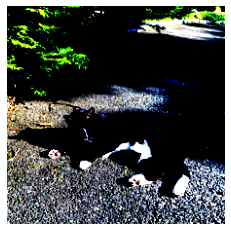

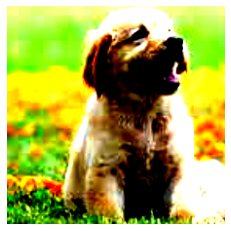

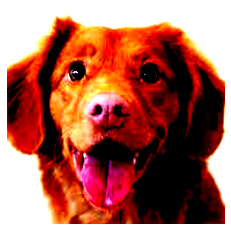

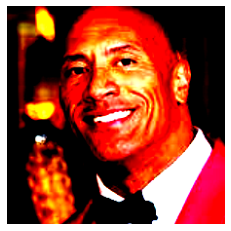

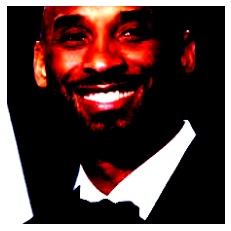

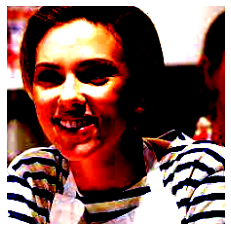

In [114]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.
my_files_test = np.array(glob("./data/myPhotos/*"))
print(my_files_test)

## suggested code, below
#for file in np.hstack((human_files[:3], dog_files[:3])):
for file in my_files_test:
    run_app(file)